In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%matplotlib inline
import matplotlib.pylab as plt
# pylab.rcParams['figure.figsize'] = (10, 5)

In [57]:
import ld_gan 
import numpy as np
import ld_gan.utils.utils as ld
from time import time

In [21]:
X, Y = ld_gan.data_proc.data_loader.load_data(10, resize=64)
Y = np.argmax(Y, axis = 1)
n_classes = int(Y.max() + 1)

100%|██████████| 102/102 [01:21<00:00,  1.40it/s]

load data from '/export/home/oblum/projects/ld_gan/data/flowers_102/jpg_train_256'


In [22]:
n_neighbors=5
batch_size = 256

In [23]:
n_classes = int(Y.max() + 1)

In [24]:
batch_idxs = np.random.randint(0, len(X), batch_size)

In [25]:
y = Y[batch_idxs]

In [40]:
all_idxs = np.arange(len(X))
sr_idxs = [all_idxs[Y==c] for c in range(n_classes)]
nn_idxs = [sr_idxs[c][np.random.randint(0, len(sr_idxs[c]), n_neighbors)] \
           for c in range(n_classes)]
x = X[nn_idxs]

In [42]:
x = x.reshape(-1, X.shape[1], X.shape[2], X.shape[3])

In [ ]:
batch_z_all = z_enc.reshape(-1, n_neighbors, z_enc.shape[-1])

# try it out

In [79]:
enc = ld_gan.utils.model_handler.load_model("xf_111v1.py", 550, "enc")

loaded model 'projects/xf_111v1.py/model/e_0550.pth'


In [111]:
sampler = ld_gan.sample.same_class_sampler(enc, X, Y, 256)

In [112]:
t = time()
x_batch, y_batch, z_batch, batch_idxs, nn_idxs, sr_idxs, z_enc, w = sampler.next()
print time() - t

0.187703132629


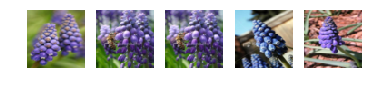

In [98]:
ld.disp(X[nn_idxs][0])

In [99]:
zs = ld_gan.utils.model_handler.apply_model(enc, X[nn_idxs][0])

In [100]:
zs.shape

(5, 512)

In [101]:
z = zs[0]*w[0][0] + zs[1]*w[0][1] + zs[2]*w[0][2] + zs[3]*w[0][3] + zs[4]*w[0][4]

In [102]:
len(z_batch)

256

In [ ]:
path = "data/faceScrub/crop/"

In [10]:
xc = [X[Y==c] for c in range(n_classes)]

In [ ]:
x = []

In [40]:
x = [X[Y==c] for c in range(n_classes)]

In [41]:
rand_idxs = [np.random.randint(0, len(x[c]), n_neighbors) for c in range(n_classes)]

In [43]:
x = [x[c][rand_idxs[c]] for c in range(n_classes)]
y = [n_neighbors*[c] for c in range(n_classes)]

In [44]:
x = np.concatenate(x)
y = np.concatenate(y)

In [22]:
y = np.argmax(y, axis=1)

In [9]:
batch_size = 256

In [5]:
X.shape

(1020, 64, 64, 3)

In [10]:
batch_idxs = np.random.randint(0, len(X), batch_size)

In [11]:
batch_idxs

array([ 837,  536,  802,  289,  120,  800,  968,  513,  674,  201,  809,
        608,  861,  514,  762,  163,  779,  323,  507,  397,    0,  472,
        314,  298,  368,  566,  251, 1000,  623,  425,  753,  507,  729,
        368,   85,  221,  417,  885,  168,  852,  362,  559,  925,   32,
        420,  306,  613,  656,  283,   99,  666,  861,  472,  827,  229,
        640, 1017,   69,  540,  571,   60,  859,  721,  955,  828,  500,
        854,  624,  247,  882,  469,  318,  950,  286,  224,  909,  286,
        665,  740,  872,  354,  523,   53,  996,  156,  729,  955,  274,
        282,  989,  106,  144,  977,  785,  465,  404,  734,  623,  339,
        646,  636,  414,  649,  288,  608,  796,  753,  234,  614,  107,
         46,  572,  749,  867,  471,  910,  678,  678,  325,  539,  269,
        707,  403,  247,  137,  546,  201,  226,  586,  730,  987,  545,
        991,  132,  385,  484,  297,  429,   36,  356,  240,  301,  479,
        525,  671,  331,  328, 1013,  823,  939,  7

In [23]:
batch_idxs = np.random.randint(0, len(X), batch_size)
x_batch = X[batch_idxs]
y_batch = y[batch_idxs]

for i in range(len(x_batch)):
    y_i = y_batch[i]
    idxs_i = np.where(y == y_i)[0]
    raw_input()

(10,)
[ 66 150 254 330 359 426 437 510 827 857]


KeyboardInterrupt: 

In [ ]:
import ld_gan
import numpy as np
import scipy.misc
import ld_gan.utils.utils as ld

import imp
fm = imp.load_source('facemesh', "/export/home/oblum/projects/Face-Align/facemesh.py")

In [4]:
path = "data/faceScrub/imgs/Aaron Eckhart/"
fnames = ld.listdir(path)

In [8]:
fname = fnames[0]

In [9]:
img = scipy.misc.imread(fname)

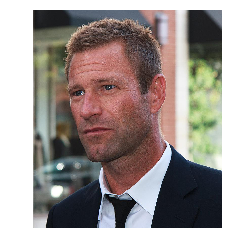

In [10]:
ld.disp([img])

In [ ]:
"data/faceScrub/imgs/"

In [11]:
ld.mkdir("data/faceScrub/align1/")

In [ ]:
fnames = 

In [ ]:
"/export/home/oblum/projects/Face-Align/"

In [15]:
fnames_scr = []
fnames_dst = []

In [16]:
PATH_SCR = "/export/home/oblum/projects/ld_gan/data/faceScrub/imgs/"
PATH_DST = "/export/home/oblum/projects/ld_gan/data/faceScrub/align1"

In [20]:
fnames_scr = []
fnames_dst = []
for i1 in os.listdir(PATH_SCR):
    f1_scr = os.path.join(PATH_SCR, i1)
    f1_dst = os.path.join(PATH_DST, i1)
    for i2 in os.listdir(f1_scr):
        f2_scr = os.path.join(f1_scr, i2)
        f2_dst = os.path.join(f1_dst, i2)
        fnames_scr.append(f2_scr)
        fnames_dst.append(f2_dst)

In [21]:
len(fnames_scr)

70063

In [22]:
len(fnames_dst)

70063

In [3]:
import torch
from ld_gan.utils.model_handler import _load_model
from ld_gan.utils.model_handler import load_model

project, epoch = "xf_111v1_gclf.py", 350

enc = load_model(project, epoch, "enc")

loaded model 'projects/xf_111v1_gclf.py/model/e_0350.pth'


In [4]:
import ld_gan.utils.utils as ld

In [ ]:
fnames = ld.listdir("data/faceScrub/imgs/", ".jpg", recrusive=True)

In [10]:
img.shape

  0%|          | 37/69854 [00:17<9:16:23,  2.09it/s]

(533, 533, 3)

<IPython.core.display.Javascript object>


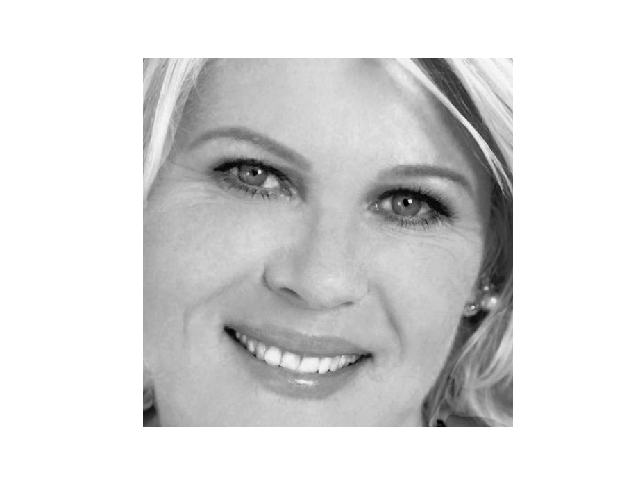

In [11]:
ld.disp([img])

In [5]:
path = "/export/home/oblum/projects/ld_gan/data/faceScrub/imgs/"
fnames = ld.listdir(path, ".jpg", recrusive=True)

In [4]:
X, Y = ld_gan.data_proc.data_loader.load_data(10, resize=64)

100%|██████████| 102/102 [00:27<00:00,  4.23it/s]

load data from '/export/home/oblum/projects/ld_gan/data/flowers_102/jpg_train_256'


In [5]:
Xt, Yt = ld_gan.data_proc.data_loader.load_data(11, resize=64)

100%|██████████| 102/102 [00:06<00:00, 15.57it/s]

load data from '/export/home/oblum/projects/ld_gan/data/flowers_102/jpg_test_256'


In [20]:
def nn(z_batch, z_all, n_neighbors=1):
    dists = pairwise_distances(z_batch, z_all)
    idxs = np.argsort(dists, axis=1)[:, :n_neighbors]
    return idxs

In [21]:
X_flat = X.reshape((X.shape[0], -1))
Xt_flat = Xt.reshape((Xt.shape[0], -1))
x_flat = np.zeros((750356, 12288))

In [25]:
t = time()
idxs = nn(Xt_flat, X_flat)
print time() - t

3.18997788429


In [24]:
idxs.shape

(750356, 1)

In [23]:
Xt_flat.shape

(1020, 12288)

In [6]:
path = "eval_imgs/nn_missing_mode/flowers"

In [10]:
x=Xt

In [33]:
X_flat = X.reshape((X.shape[0], -1))
Xt_flat = Xt.reshape((Xt.shape[0], -1))
x_flat = np.zeros((750356, 12288))

idxs_real = nn_gpu(Xt_flat, X_flat)[:,0]
idxs_fake = nn_gpu(Xt_flat, x_flat, batch_size=10000)[:,0]

for idx in tqdm(range(len(Xt))):
    i1, i2, i3 = Xt[idx], x[idxs_fake[idx]], x[idxs_real[idx]]
    img = np.concatenate([i1, i2, i3], axis=1)
    fname = os.path.join(path, str(idx).zfill(3))
    #scipy.misc.imsave(fname, img)
    jjj

[autoreload of ld_gan.utils.nearest_neighbors failed: Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "ld_gan/utils/nearest_neighbors.py", line 17
    idxs = [nn_gpu(z_all, b, n_neighbors = n_neighbors for b in tqdm(batches))]
                                                         ^
SyntaxError: invalid syntax
]


RuntimeError: cuda runtime error (2) : out of memory at /pytorch/torch/lib/THC/generated/../generic/THCTensorMathPointwise.cu:174

In [ ]:
ld_g

In [27]:
batch_size = 10000
n_batches = len(x_flat) / batch_size

In [28]:
batches = np.array_split(x_flat, n_batches)

In [29]:
n_batches

75

In [31]:
batches[-1].shape

(10004, 12288)

In [32]:
batches[1].shape

(10005, 12288)

In [ ]:
np.concatenate